# Motion Detection Data - Part 2

_Jennifer Nguyen (October 2020)_

----

This notebook analyzes motion detection data from 3 Detectors, each with their own data recording format as follows: 

**1. Detector 1** : Each time this detector is triggered the detection is saved as a file with the date & time recorded as part of the file name. The dataset provided is an index file containing a list of all detection files' details. The size of each file is also included. Note that the files with sizes less than 50KB are false detection and should be removed. The columns of the dataset are as follows:

 - size: the size, in bytes, of the detection file
 - month: the month of detection
 - day: the day of detection
 - time: the time of day of detection
 - filename: the name of the detection file it's referring to (contains the timestamp in format # - ## - YYYYMMDDHHMMSS)


**2. Detector 2** : Each time this detector is triggered it records a timestamp record of the event. The dataset columns are as follows:
 - date:  the date of detection in YYYY-MM-DD format
 - time:  the time of detection in HH:MM:SS format

 
**3. Detector 3** : This is the most interesting. Each time this detector is triggered it stores the detection data in a new txt file. The name of each file is the date of detection (with varying degrees of precision). The first line of each txt file may also contain a more precise date than that in the filename. Within each file you'll find the values corresponding to the time, in seconds, that have passed since the detector was triggered.

----

## Outline:

<a href="#s1"> **1. Read the Datasets and Data Preparation** </a>

   - 1.1 Detector 1
   - 1.2 Detector 2
   - 1.3 Detector 3
    
<a href="#s2"> **2. Exploring Data from Each Detector** </a>

   - 2.1 Detector 1
   - 2.2 Detector 2
   - 2.3 Detector 3

<a href="#s3"> **3. Exploring Detection Correlation or Relationship among 3 Detectors** </a>

In [2]:
# Checking working directory to make sure we are in the right folder
import os
os.getcwd()

'C:\\Users\\Jennifer\\Documents\\Lantern\\Project'

## <a id="s1"> 1. Read the Datasets and Data Preparation </a>

In this part, I will read the datasets, perform preliminary check of data, and convert them into data frames with a uniform format.

As a first step, I load all the modules that will be used in this notebook:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from datetime import datetime

### Detector 1

Then, I read data from Detector 1 and and give it column names:

In [4]:
detect_1 = pd.read_csv("./Detectors-200819-095026/Detector_1.txt", sep='\s+' , header=None, engine='python')
detect_1.columns = ['size', 'month', 'day', 'time', 'filename']

In [5]:
detect_1

,size,month,day,time,filename
0,151284,Apr,19,11:37,0-01-20200419063614
1,48054,Apr,21,12:50,0-01-20200421074934
2,187588,Apr,21,13:55,0-01-20200421085439
3,51584,Apr,21,14:37,0-01-20200421143636
4,63522,Apr,22,08:40,0-01-20200422083937
...,...,...,...,...,...
830,120314,Apr,25,18:27,0-57-20200425182654
831,546064,Apr,25,18:47,0-58-20200425184600
832,184202,Apr,25,18:51,0-59-20200425185051
833,625583,Apr,25,19:16,0-60-20200425191521


Since the files with sizes less than 50KB are false detection, I will remove them from Detector 1

In [6]:
# Dropping rows with less than 50Kb in size
detect_1 = detect_1[detect_1['size']> 50000]

In [7]:
detect_1

,size,month,day,time,filename
0,151284,Apr,19,11:37,0-01-20200419063614
2,187588,Apr,21,13:55,0-01-20200421085439
3,51584,Apr,21,14:37,0-01-20200421143636
4,63522,Apr,22,08:40,0-01-20200422083937
5,86802,Apr,22,13:26,0-01-20200422132541
...,...,...,...,...,...
830,120314,Apr,25,18:27,0-57-20200425182654
831,546064,Apr,25,18:47,0-58-20200425184600
832,184202,Apr,25,18:51,0-59-20200425185051
833,625583,Apr,25,19:16,0-60-20200425191521


The number of rows in the data set was reduced from 835 to 805, so we have removed 30 rows of data with size less than 50kb

I then check for number of null values in the dataframe

In [8]:
# Check number of null values
detect_1.isnull().sum(axis=0)

size        0
month       0
day         0
time        0
filename    0
dtype: int64

We can see that there is no null value in the dataframe. So I will reset the index for the dataframe.

In [9]:
detect_1.reset_index(inplace=True, drop=True)

In [10]:
detect_1

,size,month,day,time,filename
0,151284,Apr,19,11:37,0-01-20200419063614
1,187588,Apr,21,13:55,0-01-20200421085439
2,51584,Apr,21,14:37,0-01-20200421143636
3,63522,Apr,22,08:40,0-01-20200422083937
4,86802,Apr,22,13:26,0-01-20200422132541
...,...,...,...,...,...
800,120314,Apr,25,18:27,0-57-20200425182654
801,546064,Apr,25,18:47,0-58-20200425184600
802,184202,Apr,25,18:51,0-59-20200425185051
803,625583,Apr,25,19:16,0-60-20200425191521


Since the filename contains the timestamp of detection, I will add a column DateTime to store these values

In [11]:
# Add DateTime as column for detect_1
detect_1.insert(loc=0, column="DateTime", value=pd.to_datetime(detect_1["filename"].str.slice(5)), allow_duplicates = True)

# The following code is fine but has the Chain Index error message
# detect_1["DateTime"] = pd.to_datetime(detect_1["filename"].str.slice(5))

In [12]:
detect_1

,DateTime,size,month,day,time,filename
0,2020-04-19 06:36:14,151284,Apr,19,11:37,0-01-20200419063614
1,2020-04-21 08:54:39,187588,Apr,21,13:55,0-01-20200421085439
2,2020-04-21 14:36:36,51584,Apr,21,14:37,0-01-20200421143636
3,2020-04-22 08:39:37,63522,Apr,22,08:40,0-01-20200422083937
4,2020-04-22 13:25:41,86802,Apr,22,13:26,0-01-20200422132541
...,...,...,...,...,...,...
800,2020-04-25 18:26:54,120314,Apr,25,18:27,0-57-20200425182654
801,2020-04-25 18:46:00,546064,Apr,25,18:47,0-58-20200425184600
802,2020-04-25 18:50:51,184202,Apr,25,18:51,0-59-20200425185051
803,2020-04-25 19:15:21,625583,Apr,25,19:16,0-60-20200425191521


**_Note:_**
 - We will use info extracted from filename as they contain more detailed date time information

I will drop unnecessary columns to reduce the size of the dataset:

In [13]:
# Drop columns "filename", "size", "month", "day", "time"
detect_1 = detect_1.drop(columns=["filename", "size", "month", "day", "time"])

In [14]:
detect_1

,DateTime
0,2020-04-19 06:36:14
1,2020-04-21 08:54:39
2,2020-04-21 14:36:36
3,2020-04-22 08:39:37
4,2020-04-22 13:25:41
...,...
800,2020-04-25 18:26:54
801,2020-04-25 18:46:00
802,2020-04-25 18:50:51
803,2020-04-25 19:15:21


In [15]:
# Make sure the DateTime column is in datetime format
detect_1["DateTime"] = pd.to_datetime(detect_1["DateTime"])

Then I get some brief info on the dataframe

In [16]:
detect_1.info

<bound method DataFrame.info of                DateTime
0   2020-04-19 06:36:14
1   2020-04-21 08:54:39
2   2020-04-21 14:36:36
3   2020-04-22 08:39:37
4   2020-04-22 13:25:41
..                  ...
800 2020-04-25 18:26:54
801 2020-04-25 18:46:00
802 2020-04-25 18:50:51
803 2020-04-25 19:15:21
804 2020-04-25 19:19:28

[805 rows x 1 columns]>

In [17]:
# Get some descriptive statistics about Detector 1 data
detect_1.describe()

,DateTime
count,805
unique,805
top,2020-05-03 19:40:17
freq,1
first,2020-04-19 06:36:14
last,2020-05-04 20:42:00


+ We can see that there is no duplicated data in Detector 1
+ The date range for Detector 1 is from 19-Apr-2020 to 04-May-2020.

In [18]:
# Sort by DateTime
detect_1.sort_values(by=['DateTime'], inplace=True)

In [19]:
detect_1.reset_index(inplace=True, drop=True)

In [20]:
# Write clean dataset to csv file
detect_1.to_csv(r'detect_1.csv',index=False, header=True)

In [21]:
# Read clean Detector 1 dataset
#detect_1 = pd.read_csv("./detect_1.csv", engine='python')

### Detector 2

I read data from Detector 2 and and give it column names:

In [32]:
detect_2 = pd.read_csv("./Detectors-200819-095026/Detector_2.txt", header=None, engine='python')
detect_2.columns = ['idx', 'DateTime']

In [33]:
detect_2

,idx,DateTime
0,0,2020-04-04 11:05:39
1,1,2020-04-04 11:05:42
2,2,2020-04-04 11:05:45
3,3,2020-04-04 11:05:54
4,4,2020-04-04 11:06:02
...,...,...
18874,18874,2020-05-04 21:06:25
18875,18875,2020-05-04 21:12:59
18876,18876,2020-05-04 21:13:40
18877,18877,2020-05-04 21:14:25


In [34]:
# Drop column "idx" as it is no longer necessary
detect_2 = detect_2.drop(columns=["idx"])

In [35]:
# Make sure the DateTime column is in datetime format
detect_2["DateTime"] = pd.to_datetime(detect_2["DateTime"])

In [36]:
# Check number of null values
detect_2.isnull().sum(axis=0)

DateTime    0
dtype: int64

There is no null values in Detect_2 data

In [37]:
# Sort by DateTime
detect_2.sort_values(by=['DateTime'], inplace=True)

In [38]:
detect_2

,DateTime
0,2020-04-04 11:05:39
1,2020-04-04 11:05:42
2,2020-04-04 11:05:45
3,2020-04-04 11:05:54
4,2020-04-04 11:06:02
...,...
18874,2020-05-04 21:06:25
18875,2020-05-04 21:12:59
18876,2020-05-04 21:13:40
18877,2020-05-04 21:14:25


In [39]:
detect_2.describe()

,DateTime
count,18879
unique,18612
top,2020-04-27 10:39:57
freq,3
first,2020-04-04 11:05:39
last,2020-05-04 21:14:31


+ We can see that Detector 2 contains a lot more detection data than Detector 1 (approx. 18,900 rows vs. 805 rows). However, there are duplicated data in Detector 2 (count value is different from unique value). So we will drop the duplicated rows in next step.
+ The date range for Detector 2 is from 04-Apr-2020 to 04-May-2020

In [40]:
# Check for duplicated entries
detect_2[detect_2.duplicated(keep=False, subset=["DateTime"])]

,DateTime
36,2020-04-04 11:37:44
37,2020-04-04 11:37:44
38,2020-04-04 11:37:45
39,2020-04-04 11:37:45
40,2020-04-04 11:37:46
...,...
18564,2020-05-04 10:51:09
18588,2020-05-04 11:04:12
18589,2020-05-04 11:04:12
18772,2020-05-04 16:28:05


There are 531 rows that contain duplicates. Next step I will remove the duplicated rows and only keep the first instance

In [41]:
detect_2.drop_duplicates(subset ="DateTime", keep = "first", inplace = True) 

In [42]:
detect_2.describe()

,DateTime
count,18612
unique,18612
top,2020-04-23 20:13:13
freq,1
first,2020-04-04 11:05:39
last,2020-05-04 21:14:31


In [43]:
detect_2.reset_index(inplace=True, drop=True)

In [44]:
# Write clean dataset to csv file
detect_2.to_csv(r'detect_2.csv',index=False, header=True)

In [5]:
# Read clean Detector 2 dataset
# detect_2 = pd.read_csv("./detect_2.csv", engine='python')

### Detector 3

I will then read data from Detector 3. These info are contained in different files so the process is more complicated.

In [45]:
import glob

In [46]:
# Getting a list of filenames in the folder Detector_3
filenames = glob.glob('./Detectors-200819-095026/Detector_3/*.txt')

In [47]:
filenames

['./Detectors-200819-095026/Detector_3\\3271823.txt',
 './Detectors-200819-095026/Detector_3\\3_21_19.TXT',
 './Detectors-200819-095026/Detector_3\\3_24_8.TXT',
 './Detectors-200819-095026/Detector_3\\3_27_18_23.txt',
 './Detectors-200819-095026/Detector_3\\3_28_11_12.txt',
 './Detectors-200819-095026/Detector_3\\3_29_15_37.txt',
 './Detectors-200819-095026/Detector_3\\3_29_8_57.txt',
 './Detectors-200819-095026/Detector_3\\3_30_17_31.txt',
 './Detectors-200819-095026/Detector_3\\3_30_1_21.txt',
 './Detectors-200819-095026/Detector_3\\3_31_7_31.txt',
 './Detectors-200819-095026/Detector_3\\4-18-15.TXT',
 './Detectors-200819-095026/Detector_3\\4-22-13.TXT',
 './Detectors-200819-095026/Detector_3\\4-29-11.TXT',
 './Detectors-200819-095026/Detector_3\\4_03_15_49.txt',
 './Detectors-200819-095026/Detector_3\\4_09_09_46.txt',
 './Detectors-200819-095026/Detector_3\\4_1_17_38.txt',
 './Detectors-200819-095026/Detector_3\\4_2_20_19.txt',
 './Detectors-200819-095026/Detector_3\\4_2_8_16.txt',


In [48]:
# Trim filenames to contain name of files only
for i in range(len(filenames)):
    filenames[i] = filenames[i][37:]

In [49]:
# Read them into a list of dataframes
list_of_dfs = [pd.read_csv('./Detectors-200819-095026/Detector_3/'+filename, skiprows=1) for filename in filenames]

In [50]:
list_of_dfs

[          1
 0         4
 1        19
 2        22
 3        25
 4        30
 ...     ...
 1110  60402
 1111  60405
 1112  60408
 1113  60411
 1114  60414
 
 [1115 rows x 1 columns],
          1
 0        4
 1       22
 2       25
 3       28
 4       31
 ..     ...
 403  28030
 404  28033
 405  28036
 406  28039
 407  28042
 
 [408 rows x 1 columns],
         1
 0       4
 1      32
 2      35
 3      38
 4      41
 ..    ...
 565  6783
 566  6786
 567  6789
 568  6792
 569  6795
 
 [570 rows x 1 columns],
           1
 0         4
 1        19
 2        22
 3        25
 4        30
 ...     ...
 1110  60402
 1111  60405
 1112  60408
 1113  60411
 1114  60414
 
 [1115 rows x 1 columns],
           1
 0         4
 1        19
 2        22
 3        25
 4        28
 ...     ...
 2318  78324
 2319  78327
 2320  78330
 2321  78333
 2322  78336
 
 [2323 rows x 1 columns],
           1
 0         4
 1        22
 2        25
 3        28
 4        31
 ...     ...
 4026  73471
 4027  73474
 

In [51]:
# Adding the filename and DateTime to each dataframe
for dataframe, filename in zip(list_of_dfs, filenames):
    dataframe['filename'] = filename
    
    if "3271823" in filename:
        datetime_i = pd.to_datetime("2020-03-27 18:23")
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
        
    elif "3_21_19" in filename:
        datetime_i = pd.to_datetime("2020-03-21 19:59")
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
        
    elif "3_24_8" in filename:
        datetime_i = pd.to_datetime("2020-03-24 08:52")
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
        
    elif "3_27_18_23" in filename:
        datetime_i = pd.to_datetime("2020-03-27 18:23")
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
      
    elif "3_28_11_12" in filename:
        datetime_i = pd.to_datetime("2020-03-28 11:12")
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
     
    elif "3_29_15_37" in filename:
        datetime_i = pd.to_datetime("2020-03-29 15:37")
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
  
    elif "3_29_8_57" in filename:
        datetime_i = pd.to_datetime("2020-03-29 08:57")
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
        
    elif "3_30_17_31" in filename:
        datetime_i = pd.to_datetime("2020-03-30 17:31")
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
        
    elif "3_30_1_21" in filename:
        datetime_i = pd.to_datetime("2020-03-30 01:21")
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
       
    elif "3_31_7_31" in filename:
        datetime_i = pd.to_datetime("2020-03-31 07:31")
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
        
    elif "4-18-15" in filename:
        datetime_i = pd.to_datetime("2020-04-18 15:23:56")
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
       
    elif "4-22-13" in filename:
        datetime_i = pd.to_datetime("2020-04-22 13:47:35")
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
     
    elif "4-29-11" in filename:
        datetime_i = pd.to_datetime("2020-04-29 11:39:57")
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
             
    elif "4_03_15_49" in filename:
        datetime_i = pd.to_datetime("2020-04-03 15:49:00")
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
      
    elif "4_09_09_46" in filename:
        datetime_i = pd.to_datetime("2020-04-09 09:46:00")
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
       
    elif "4_1_17_38" in filename:
        datetime_i = pd.to_datetime("2020-04-01 17:38:00")
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
    
    elif "4_2_20_19" in filename:
        datetime_i = pd.to_datetime("2020-04-02 20:19:00")
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
      
    elif "4_2_8_16" in filename:
        datetime_i = pd.to_datetime("2020-04-02 08:16:00")
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
      
    elif "4_3_15_49" in filename:
        datetime_i = pd.to_datetime("2020-04-03 15:49:00")
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
    
    elif "4_3_8_55.txt" in filename:
        datetime_i = pd.to_datetime("2020-04-03 08:55:00")        
        dataframe['DateTime'] = datetime_i + pd.to_timedelta(dataframe["1"],unit='s')
        

In [52]:
dataframe

,1,filename,DateTime
0,6,4_3_8_55.txt,2020-04-03 08:55:06
1,9,4_3_8_55.txt,2020-04-03 08:55:09
2,12,4_3_8_55.txt,2020-04-03 08:55:12
3,15,4_3_8_55.txt,2020-04-03 08:55:15
4,18,4_3_8_55.txt,2020-04-03 08:55:18
...,...,...,...
2130,23448,4_3_8_55.txt,2020-04-03 15:25:48
2131,23461,4_3_8_55.txt,2020-04-03 15:26:01
2132,23464,4_3_8_55.txt,2020-04-03 15:26:04
2133,23472,4_3_8_55.txt,2020-04-03 15:26:12


In [53]:
list_of_dfs

[          1     filename            DateTime
 0         4  3271823.txt 2020-03-27 18:23:04
 1        19  3271823.txt 2020-03-27 18:23:19
 2        22  3271823.txt 2020-03-27 18:23:22
 3        25  3271823.txt 2020-03-27 18:23:25
 4        30  3271823.txt 2020-03-27 18:23:30
 ...     ...          ...                 ...
 1110  60402  3271823.txt 2020-03-28 11:09:42
 1111  60405  3271823.txt 2020-03-28 11:09:45
 1112  60408  3271823.txt 2020-03-28 11:09:48
 1113  60411  3271823.txt 2020-03-28 11:09:51
 1114  60414  3271823.txt 2020-03-28 11:09:54
 
 [1115 rows x 3 columns],
          1     filename            DateTime
 0        4  3_21_19.TXT 2020-03-21 19:59:04
 1       22  3_21_19.TXT 2020-03-21 19:59:22
 2       25  3_21_19.TXT 2020-03-21 19:59:25
 3       28  3_21_19.TXT 2020-03-21 19:59:28
 4       31  3_21_19.TXT 2020-03-21 19:59:31
 ..     ...          ...                 ...
 403  28030  3_21_19.TXT 2020-03-22 03:46:10
 404  28033  3_21_19.TXT 2020-03-22 03:46:13
 405  28036  3_

In [54]:
# Combine a list of dataframes, on top of each other
detect_3 = pd.concat(list_of_dfs, ignore_index=True)

In [55]:
detect_3

,1,filename,DateTime
0,4,3271823.txt,2020-03-27 18:23:04
1,19,3271823.txt,2020-03-27 18:23:19
2,22,3271823.txt,2020-03-27 18:23:22
3,25,3271823.txt,2020-03-27 18:23:25
4,30,3271823.txt,2020-03-27 18:23:30
...,...,...,...
101039,23448,4_3_8_55.txt,2020-04-03 15:25:48
101040,23461,4_3_8_55.txt,2020-04-03 15:26:01
101041,23464,4_3_8_55.txt,2020-04-03 15:26:04
101042,23472,4_3_8_55.txt,2020-04-03 15:26:12


In [56]:
# Check for duplicated entries
detect_3[detect_3.duplicated(keep="first", subset=["DateTime"])]

,1,filename,DateTime
2093,4,3_27_18_23.txt,2020-03-27 18:23:04
2094,19,3_27_18_23.txt,2020-03-27 18:23:19
2095,22,3_27_18_23.txt,2020-03-27 18:23:22
2096,25,3_27_18_23.txt,2020-03-27 18:23:25
2097,30,3_27_18_23.txt,2020-03-27 18:23:30
...,...,...,...
98914,21,4_3_8_55.txt,2020-04-03 08:55:21
98915,24,4_3_8_55.txt,2020-04-03 08:55:24
98916,27,4_3_8_55.txt,2020-04-03 08:55:27
98917,30,4_3_8_55.txt,2020-04-03 08:55:30


In [57]:
# Drop duplicated entries
detect_3 = detect_3[~detect_3.duplicated(keep="first", subset=["DateTime"])]

In [58]:
detect_3

,1,filename,DateTime
0,4,3271823.txt,2020-03-27 18:23:04
1,19,3271823.txt,2020-03-27 18:23:19
2,22,3271823.txt,2020-03-27 18:23:22
3,25,3271823.txt,2020-03-27 18:23:25
4,30,3271823.txt,2020-03-27 18:23:30
...,...,...,...
101039,23448,4_3_8_55.txt,2020-04-03 15:25:48
101040,23461,4_3_8_55.txt,2020-04-03 15:26:01
101041,23464,4_3_8_55.txt,2020-04-03 15:26:04
101042,23472,4_3_8_55.txt,2020-04-03 15:26:12


In [59]:
# Drop "1" and "filename" columns
detect_3 = detect_3.drop(columns=["1", "filename"])

In [60]:
detect_3

,DateTime
0,2020-03-27 18:23:04
1,2020-03-27 18:23:19
2,2020-03-27 18:23:22
3,2020-03-27 18:23:25
4,2020-03-27 18:23:30
...,...
101039,2020-04-03 15:25:48
101040,2020-04-03 15:26:01
101041,2020-04-03 15:26:04
101042,2020-04-03 15:26:12


In [61]:
# Make sure the DateTime column is in datetime format
detect_3["DateTime"] = pd.to_datetime(detect_3["DateTime"])

In [62]:
# Sort by DateTime
detect_3.sort_values(by=['DateTime'], inplace=True)

In [63]:
detect_3

,DateTime
1115,2020-03-21 19:59:04
1116,2020-03-21 19:59:22
1117,2020-03-21 19:59:25
1118,2020-03-21 19:59:28
1119,2020-03-21 19:59:31
...,...
62340,2020-05-01 21:49:07
62341,2020-05-01 21:49:52
62342,2020-05-01 21:49:55
62343,2020-05-01 21:49:58


In [64]:
detect_3.describe()

,DateTime
count,93735
unique,93735
top,2020-05-01 20:57:47
freq,1
first,2020-03-21 19:59:04
last,2020-05-01 21:50:01


+ We can see that Detector 3 contains a lot more detection data than both Detectors 1 & 2 (approx. 93,000 rows vs. 805 rows (Detector 1) and 18,900 (Detector 2). This might be a challenge if we plot all data from 3 detectors into the same plot.
+ There is no duplicated rows in Detector 3.
+ The date range for Detector 3 is from 21-Mar-2020 to 01-May-2020.

In [65]:
detect_3.reset_index(inplace=True, drop=True)

In [66]:
# Write clean dataset to csv file
detect_3.to_csv(r'detect_3.csv',index=False, header=True)

In [6]:
# Read clean Detector 3 dataset
# detect_3 = pd.read_csv("./detect_3.csv", engine='python')

## <a id="s2"> 2. Exploring Data from Each Detector </a>

### Detector 1

In [22]:
detect_1

,DateTime
0,2020-04-19 06:36:14
1,2020-04-19 06:37:13
2,2020-04-21 08:54:39
3,2020-04-21 09:06:02
4,2020-04-21 09:16:20
...,...
800,2020-05-04 20:07:18
801,2020-05-04 20:08:18
802,2020-05-04 20:09:33
803,2020-05-04 20:13:09


In [23]:
# Make sure the DateTime column is in datetime format
detect_1["DateTime"] = pd.to_datetime(detect_1["DateTime"])

In [24]:
# Add a column for each detection signal 
detect_1.insert(1, "det", 1, allow_duplicates = True) 

In [25]:
detect_1_hourly = detect_1.groupby(pd.Grouper(key="DateTime", freq="H")).count()

In [26]:
detect_1_hourly.index

DatetimeIndex(['2020-04-19 06:00:00', '2020-04-19 07:00:00',
               '2020-04-19 08:00:00', '2020-04-19 09:00:00',
               '2020-04-19 10:00:00', '2020-04-19 11:00:00',
               '2020-04-19 12:00:00', '2020-04-19 13:00:00',
               '2020-04-19 14:00:00', '2020-04-19 15:00:00',
               ...
               '2020-05-04 11:00:00', '2020-05-04 12:00:00',
               '2020-05-04 13:00:00', '2020-05-04 14:00:00',
               '2020-05-04 15:00:00', '2020-05-04 16:00:00',
               '2020-05-04 17:00:00', '2020-05-04 18:00:00',
               '2020-05-04 19:00:00', '2020-05-04 20:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=375, freq='H')

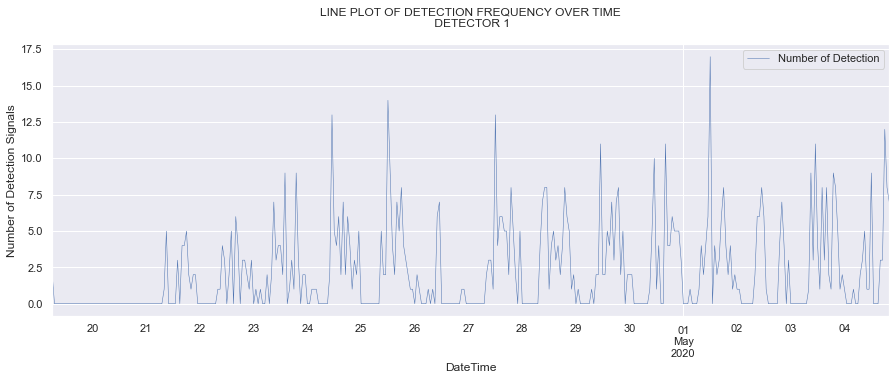

In [27]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,5)})
detect_1_hourly.plot(linewidth=0.5);

# Set x and y label and legend
plt.xlabel('DateTime')
plt.ylabel('Number of Detection Signals')
plt.legend(['Number of Detection'])

# Set title
title = 'Line Plot of Detection Frequency Over Time\n Detector 1\n'.upper()
plt.title(title, loc='center')
plt.show()

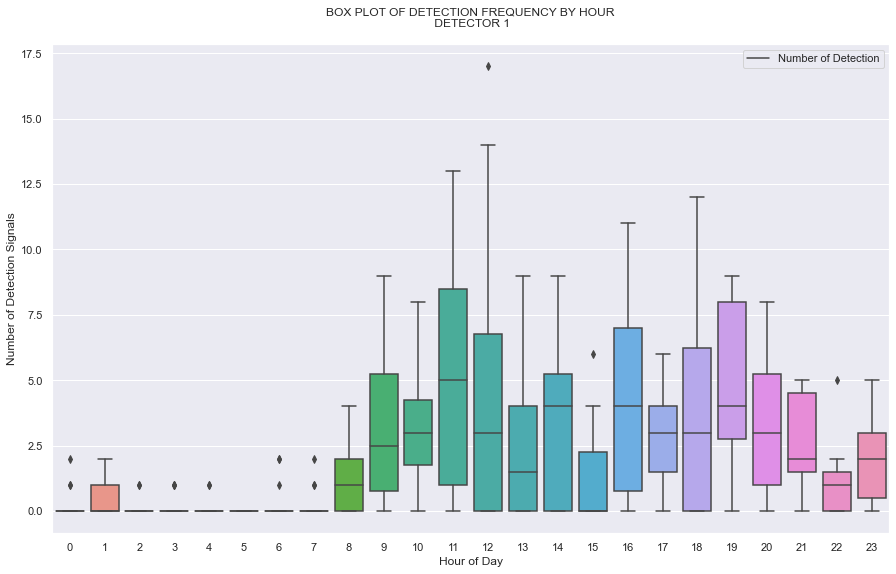

In [28]:
# Define figure
fig, ax = plt.subplots(figsize=(15,9))

# Plot boxplot of detection by hour
sns.boxplot(x=detect_1_hourly.index.hour, y=detect_1_hourly['det'], ax=ax)

# Set x and y label
plt.xlabel('Hour of Day')
plt.ylabel('Number of Detection Signals')
plt.legend(['Number of Detection'])

# title
title = 'Box Plot of Detection Frequency by Hour\n Detector 1\n'.upper()
plt.title(title, loc='center')
plt.show()

In [29]:
detect_1_hourly_heat=detect_1_hourly.groupby([detect_1_hourly.index.hour, detect_1_hourly.index.date])['det'].sum().unstack()

In [30]:
detect_1_hourly_heat

,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04
DateTime,,,,,,,,,,,,,,,,
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0
1,NaN,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0
2,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
8,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,4.0,0.0,0.0,4.0,2.0,1.0,3.0


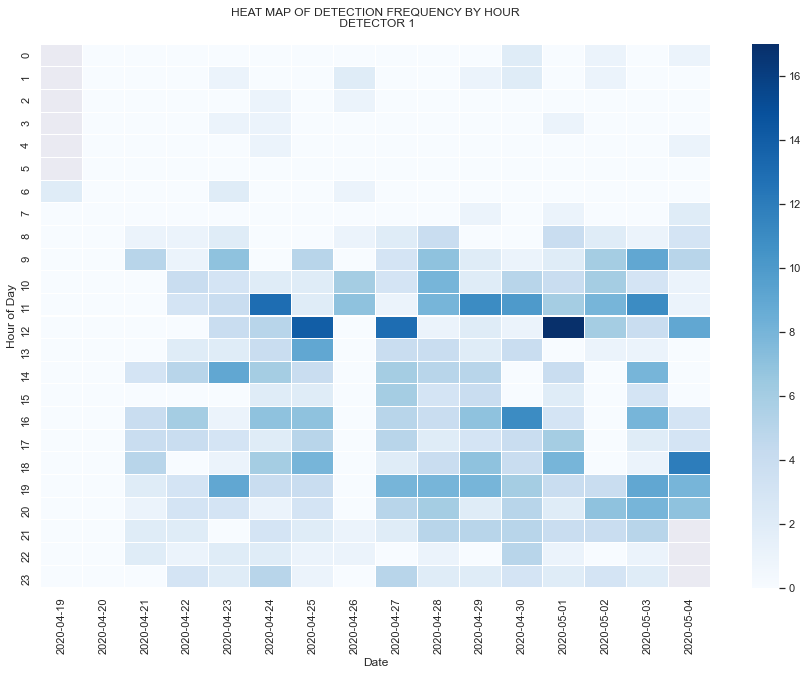

In [31]:
# figure
fig, ax = plt.subplots(figsize=(15,10))

# Plot heatmap of detection by hour
sns.heatmap(detect_1_hourly_heat, cmap="Blues", linewidth=0.1, ax=ax)

# Set x and y label
plt.xlabel('Date')
plt.ylabel('Hour of Day')

# title
title = 'Heat Map of Detection Frequency by Hour\n Detector 1\n'.upper()
plt.title(title, loc='center')
plt.show()

#### *Detector 1 Observation*
+ There was almost zero detection in the first two days. 
+ The number of detection is lowest during the beggining or end of the day (around mid night till 8am)
+ The number of detections peak in the middle of the day, which makes sense (i.e. more activity during the day)
+ The most number of observations is much lower on 26-Apr-2020 compared to the day before and after (25 and 27-Apr-2020)
+ The highest number of detection occured on 01-May-2020 from 12-1pm

### Detector 2

In [67]:
detect_2

,DateTime
0,2020-04-04 11:05:39
1,2020-04-04 11:05:42
2,2020-04-04 11:05:45
3,2020-04-04 11:05:54
4,2020-04-04 11:06:02
...,...
18607,2020-05-04 21:06:25
18608,2020-05-04 21:12:59
18609,2020-05-04 21:13:40
18610,2020-05-04 21:14:25


In [68]:
# Make sure the DateTime column is in datetime format
detect_2["DateTime"] = pd.to_datetime(detect_2["DateTime"])

In [69]:
# Add a column for each detection signal 
detect_2.insert(1, "det", 1, allow_duplicates = True) 

In [70]:
detect_2

,DateTime,det
0,2020-04-04 11:05:39,1
1,2020-04-04 11:05:42,1
2,2020-04-04 11:05:45,1
3,2020-04-04 11:05:54,1
4,2020-04-04 11:06:02,1
...,...,...
18607,2020-05-04 21:06:25,1
18608,2020-05-04 21:12:59,1
18609,2020-05-04 21:13:40,1
18610,2020-05-04 21:14:25,1


In [71]:
detect_2_hourly = detect_2.groupby(pd.Grouper(key="DateTime", freq="H")).count()

In [72]:
detect_2_hourly

,det
DateTime,
2020-04-04 11:00:00,99
2020-04-04 12:00:00,28
2020-04-04 13:00:00,23
2020-04-04 14:00:00,42
2020-04-04 15:00:00,15
...,...
2020-05-04 17:00:00,19
2020-05-04 18:00:00,21
2020-05-04 19:00:00,13


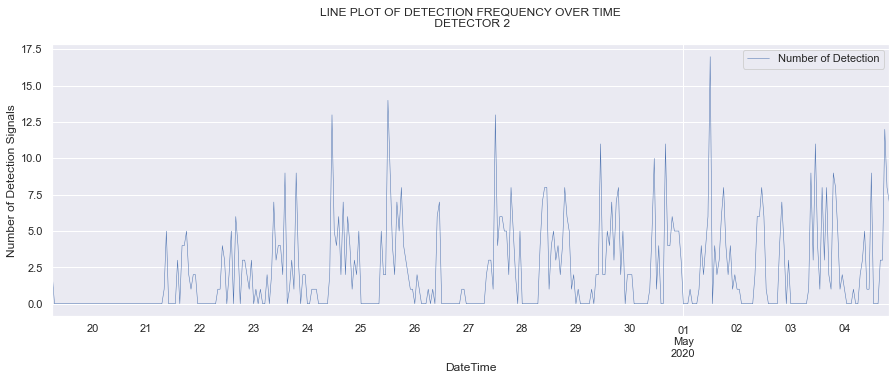

In [73]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,5)})
detect_1_hourly.plot(linewidth=0.5);

# Set x and y label and legend
plt.xlabel('DateTime')
plt.ylabel('Number of Detection Signals')
plt.legend(['Number of Detection'])

# Set title
title = 'Line Plot of Detection Frequency Over Time\n Detector 2\n'.upper()
plt.title(title, loc='center')
plt.show()

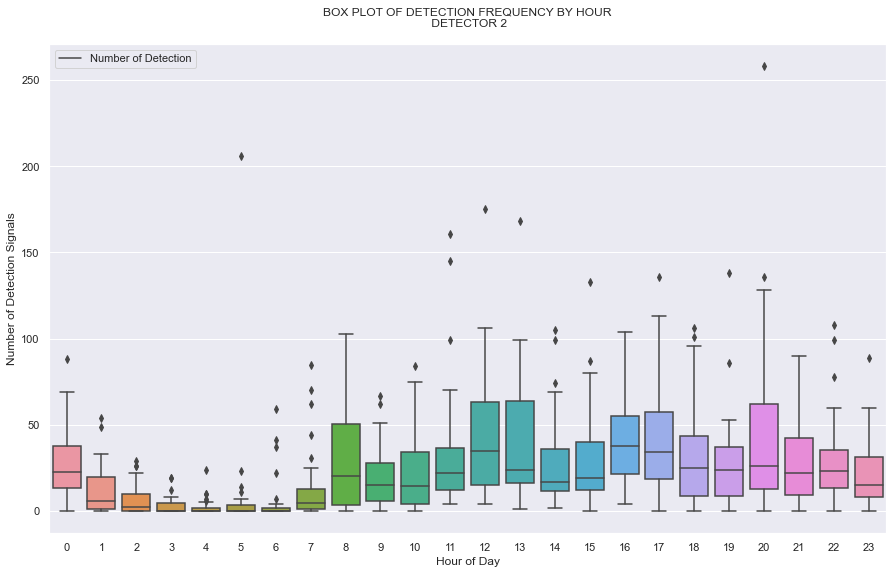

In [74]:
# Define figure
fig, ax = plt.subplots(figsize=(15,9))

# Plot boxplot of detection by hour
sns.boxplot(x=detect_2_hourly.index.hour, y=detect_2_hourly['det'], ax=ax)

# Set x and y label
plt.xlabel('Hour of Day')
plt.ylabel('Number of Detection Signals')
plt.legend(['Number of Detection'])

# title
title = 'Box Plot of Detection Frequency by Hour\n Detector 2\n'.upper()
plt.title(title, loc='center')
plt.show()

In [75]:
detect_2_hourly_heat=detect_2_hourly.groupby([detect_2_hourly.index.hour, detect_2_hourly.index.date])['det'].sum().unstack()

In [76]:
detect_2_hourly_heat

,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,...,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04
DateTime,,,,,,,,,,,,,,,,,,,,,
0,NaN,69.0,21.0,4.0,15.0,13.0,19.0,23.0,16.0,29.0,...,4.0,41.0,45.0,10.0,17.0,24.0,10.0,88.0,26.0,0.0
1,NaN,2.0,0.0,0.0,5.0,13.0,1.0,4.0,0.0,0.0,...,0.0,23.0,49.0,54.0,3.0,14.0,6.0,9.0,1.0,0.0
2,NaN,3.0,0.0,2.0,0.0,0.0,4.0,10.0,0.0,0.0,...,0.0,18.0,26.0,26.0,0.0,0.0,4.0,0.0,0.0,10.0
3,NaN,0.0,0.0,0.0,5.0,0.0,5.0,7.0,0.0,6.0,...,0.0,0.0,19.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
4,NaN,2.0,0.0,0.0,0.0,0.0,10.0,6.0,7.0,0.0,...,0.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,10.0
5,NaN,2.0,0.0,0.0,0.0,4.0,4.0,2.0,11.0,0.0,...,0.0,23.0,0.0,206.0,0.0,0.0,0.0,14.0,0.0,2.0
6,NaN,7.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,59.0,2.0,37.0,0.0,0.0,22.0,41.0,0.0,0.0
7,NaN,2.0,0.0,10.0,25.0,0.0,0.0,0.0,1.0,5.0,...,3.0,31.0,3.0,13.0,44.0,0.0,5.0,85.0,11.0,17.0
8,NaN,1.0,54.0,82.0,19.0,51.0,6.0,0.0,3.0,10.0,...,0.0,33.0,9.0,38.0,25.0,6.0,49.0,29.0,3.0,24.0


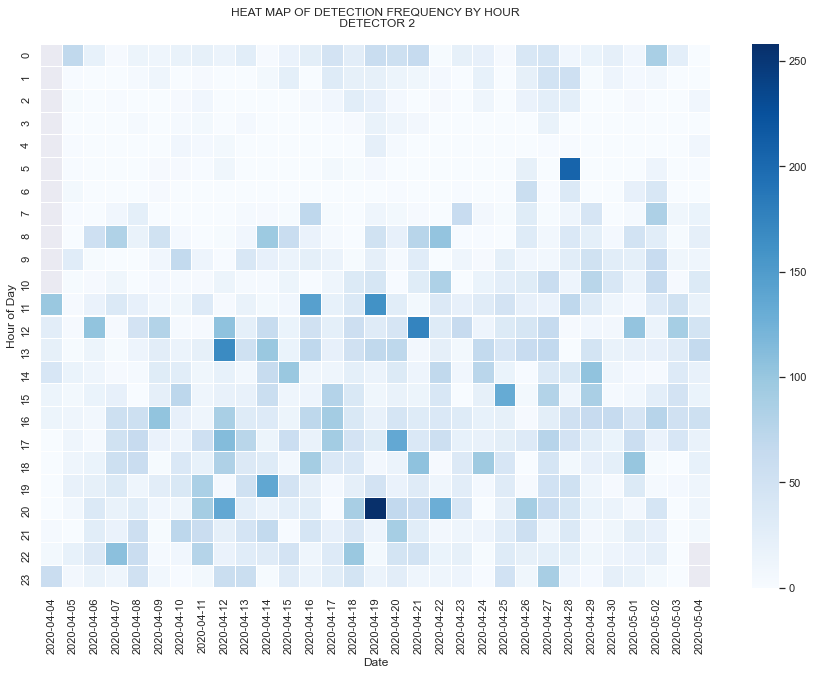

In [77]:
# figure
fig, ax = plt.subplots(figsize=(15,10))

# Plot heatmap of detection by hour
sns.heatmap(detect_2_hourly_heat, cmap="Blues", linewidth=0.1, ax=ax)

# Set x and y label
plt.xlabel('Date')
plt.ylabel('Hour of Day')

# title
title = 'Heat Map of Detection Frequency by Hour\n Detector 2\n'.upper()
plt.title(title, loc='center')
plt.show()

#### *Detector 2 Observation*
+ The majority of the number of detection per hour is between 0-60 (main body of the boxes), but there are some outliers
+ We can see that the number of detection is lowest during the beggining of the day (around mid-night till 7am morning)
+ The number of detections peak in the middle of the day, and some until 8pm (i.e. more activity during the day)
+ The body of the boxes in the boxplot is smaller compared to Detector 1, indicating the data is more condensed (closer together).
+ The highest number of detection occured on 19-Apr-2020 from 8-9pm.
+ There are more outliers than in Detector 1.

### Detector 3

In [78]:
detect_3

,DateTime
0,2020-03-21 19:59:04
1,2020-03-21 19:59:22
2,2020-03-21 19:59:25
3,2020-03-21 19:59:28
4,2020-03-21 19:59:31
...,...
93730,2020-05-01 21:49:07
93731,2020-05-01 21:49:52
93732,2020-05-01 21:49:55
93733,2020-05-01 21:49:58


In [79]:
# Make sure the DateTime column is in datetime format
detect_3["DateTime"] = pd.to_datetime(detect_3["DateTime"])

In [80]:
# Add a column for each detection signal 
detect_3.insert(1, "det", 1, allow_duplicates = True) 

In [81]:
detect_3_hourly = detect_3.groupby(pd.Grouper(key="DateTime", freq="H")).count()

In [82]:
detect_3_hourly

,det
DateTime,
2020-03-21 19:00:00,14
2020-03-21 20:00:00,77
2020-03-21 21:00:00,16
2020-03-21 22:00:00,30
2020-03-21 23:00:00,27
...,...
2020-05-01 17:00:00,106
2020-05-01 18:00:00,32
2020-05-01 19:00:00,112


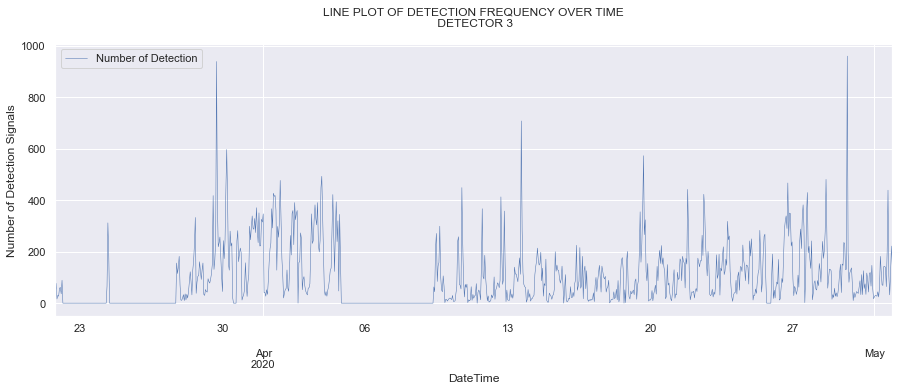

In [83]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,5)})
detect_3_hourly.plot(linewidth=0.5);

# Set x and y label and legend
plt.xlabel('DateTime')
plt.ylabel('Number of Detection Signals')
plt.legend(['Number of Detection'])

# Set title
title = 'Line Plot of Detection Frequency Over Time\n Detector 3\n'.upper()
plt.title(title, loc='center')
plt.show()

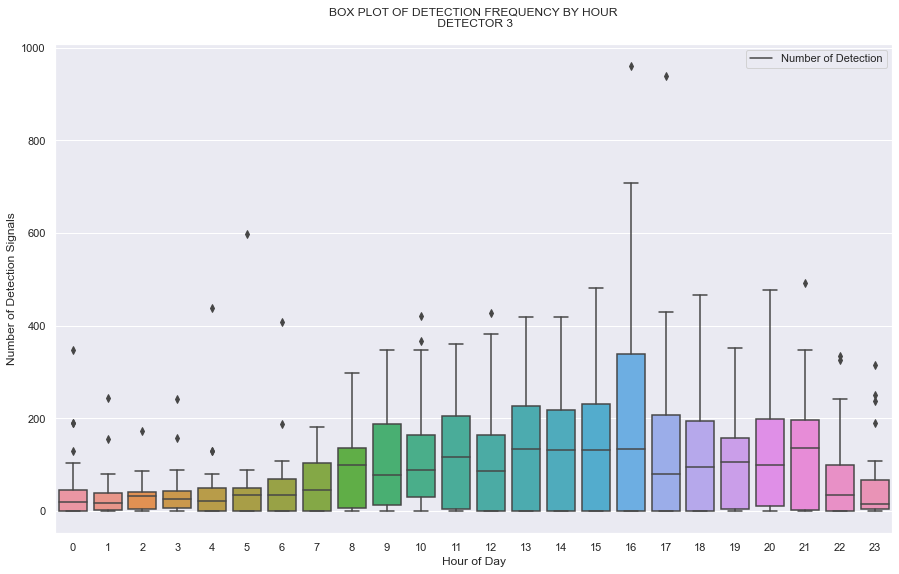

In [84]:
# Define figure
fig, ax = plt.subplots(figsize=(15,9))

# Plot boxplot of detection by hour
sns.boxplot(x=detect_3_hourly.index.hour, y=detect_3_hourly['det'], ax=ax)

# Set x and y label
plt.xlabel('Hour of Day')
plt.ylabel('Number of Detection Signals')
plt.legend(['Number of Detection'])

# title
title = 'Box Plot of Detection Frequency by Hour\n Detector 3\n'.upper()
plt.title(title, loc='center')
plt.show()

In [85]:
detect_3_hourly_heat=detect_3_hourly.groupby([detect_3_hourly.index.hour, detect_3_hourly.index.date])['det'].sum().unstack()

In [86]:
detect_3_hourly_heat

,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,...,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01
DateTime,,,,,,,,,,,,,,,,,,,,,
0,NaN,58.0,0.0,0.0,0.0,0.0,0.0,11.0,129.0,45.0,...,28.0,35.0,24.0,190.0,191.0,94.0,40.0,22.0,42.0,25.0
1,NaN,61.0,0.0,0.0,0.0,0.0,0.0,20.0,156.0,243.0,...,44.0,54.0,7.0,12.0,18.0,29.0,79.0,58.0,22.0,30.0
2,NaN,36.0,0.0,0.0,0.0,0.0,0.0,33.0,34.0,173.0,...,42.0,24.0,32.0,31.0,50.0,65.0,87.0,27.0,33.0,29.0
3,NaN,89.0,0.0,0.0,0.0,0.0,0.0,10.0,30.0,242.0,...,46.0,43.0,40.0,30.0,20.0,55.0,55.0,40.0,45.0,27.0
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,36.0,53.0,439.0,...,20.0,34.0,41.0,55.0,62.0,34.0,51.0,25.0,41.0,44.0
5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,13.0,45.0,597.0,...,48.0,80.0,89.0,38.0,82.0,49.0,88.0,39.0,38.0,24.0
6,NaN,0.0,0.0,0.0,0.0,0.0,0.0,34.0,43.0,409.0,...,57.0,188.0,35.0,82.0,74.0,109.0,68.0,71.0,63.0,62.0
7,NaN,0.0,0.0,0.0,0.0,0.0,0.0,20.0,95.0,153.0,...,45.0,96.0,104.0,116.0,170.0,62.0,154.0,118.0,87.0,182.0
8,NaN,0.0,0.0,66.0,0.0,0.0,0.0,45.0,84.0,128.0,...,175.0,111.0,121.0,131.0,12.0,241.0,129.0,151.0,33.0,122.0


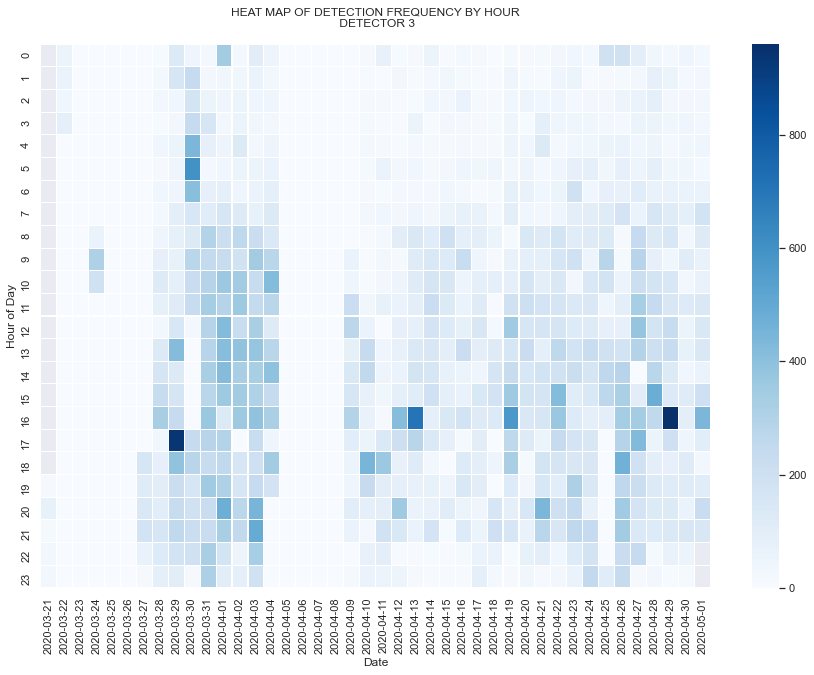

In [87]:
# figure
fig, ax = plt.subplots(figsize=(15,10))

# Plot heatmap of detection by hour
sns.heatmap(detect_3_hourly_heat, cmap="Blues", linewidth=0.1, ax=ax)

# Set x and y label
plt.xlabel('Date')
plt.ylabel('Hour of Day')

# title
title = 'Heat Map of Detection Frequency by Hour\n Detector 3\n'.upper()
plt.title(title, loc='center')
plt.show()

#### *Detector 3 observation*

+ We can see the same trend as Detector 1 and 2 in terms of less detection activity from midnight till 8am, and there are more detection activity during the day (8am - mid night)  
+ For the first week (21-Mar to 27 Mar-2020) there is very little detection activity. In addition there is no detection activity from 05-Apr to 08-Apr-2020. 
+ There are more detection activity from 27-Mar to 04-Apr-2020 than in the period from 09-Apr to 01-May-2020, suggesting the detector is more sensitive in the beginning.
+ Size of the box in the box plot is biggest at 4pm, other than that the size of the boxes are fairly even from 9am-9pm.

## <a id="s3"> 3. Exploring Detection Correlation or Relationship among 3 Detectors </a>

### Merging dataframes on 5 minutes interval to check overlapping

In [88]:
detect_1_5min = detect_1.groupby(pd.Grouper(key="DateTime", freq="5min")).count()

In [89]:
detect_1_5min

,det
DateTime,
2020-04-19 06:35:00,2
2020-04-19 06:40:00,0
2020-04-19 06:45:00,0
2020-04-19 06:50:00,0
2020-04-19 06:55:00,0
...,...
2020-05-04 20:20:00,0
2020-05-04 20:25:00,0
2020-05-04 20:30:00,0


In [90]:
detect_2_5min = detect_2.groupby(pd.Grouper(key="DateTime", freq="5min")).count()

In [91]:
detect_3_5min = detect_3.groupby(pd.Grouper(key="DateTime", freq="5min")).count()

In [92]:
m1 = detect_1_5min.merge(detect_2_5min, how='outer', on="DateTime")

In [93]:
m1 

,det_x,det_y
DateTime,,
2020-04-19 06:35:00,2.0,0
2020-04-19 06:40:00,0.0,0
2020-04-19 06:45:00,0.0,0
2020-04-19 06:50:00,0.0,0
2020-04-19 06:55:00,0.0,1
...,...,...
2020-05-04 20:50:00,NaN,0
2020-05-04 20:55:00,NaN,0
2020-05-04 21:00:00,NaN,1


In [94]:
#m = pd.merge_asof(m1, detect_3_5min, on="DateTime", direction='nearest')
m = m1.merge(detect_3_5min, how='outer', on="DateTime")

In [95]:
m

,det_x,det_y,det
DateTime,,,
2020-04-19 06:35:00,2.0,0.0,11.0
2020-04-19 06:40:00,0.0,0.0,3.0
2020-04-19 06:45:00,0.0,0.0,13.0
2020-04-19 06:50:00,0.0,0.0,14.0
2020-04-19 06:55:00,0.0,1.0,15.0
...,...,...,...
2020-04-04 10:40:00,NaN,NaN,52.0
2020-04-04 10:45:00,NaN,NaN,49.0
2020-04-04 10:50:00,NaN,NaN,36.0


In [96]:
m.rename(columns={"det_x":"det_1", "det_y":"det_2", "det": "det_3"}, inplace=True)

No handles with labels found to put in legend.


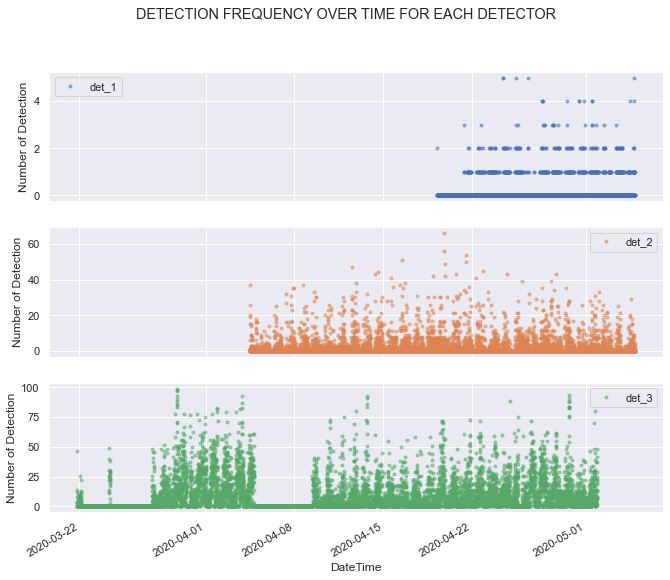

In [98]:
# Set columns to plot
cols_plot = ['det_1', 'det_2', 'det_3']
title = 'Detection Frequency Over Time For Each Detector'.upper()
axes = m[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True, title=title)

# Set legend and x and y label
ax.legend()
plt.xlabel('DateTime')
for ax in axes:
    ax.set_ylabel('Number of Detection')
    
plt.show()

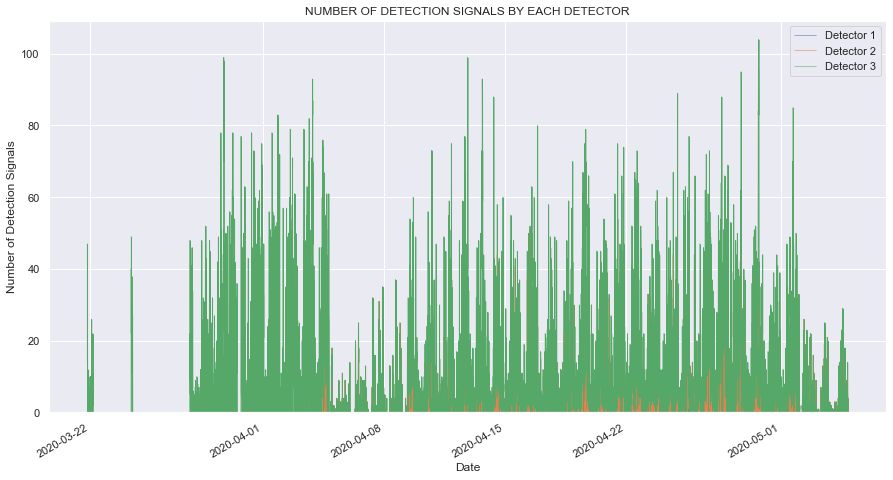

In [99]:
# Set figure
fig, ax = plt.subplots(figsize=(15,8))

m[['det_1', 'det_2', 'det_3']].plot.area(ax=ax, linewidth=0.5)

# Set legend and x and y label
plt.legend(['Detector 1', 'Detector 2', 'Detector 3'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of Detection Signals')

# title
title = 'Number of Detection Signals by Each Detector'.upper()
plt.title(title, loc='center')
plt.show()

#### *Observation*

+ Most of the time there were no detection data (peak at 0)
+ Detector 3 has the most number of detections and appear to be most sensitive
+ Detector 1 is least sensitive (majority of time frequency of detection per 5m interval is less than 4)
+ Signals are most overlapped between approximately 22-Apr to 01-May (not too visible in this graph but if we set linewidth=0 it's easier to see

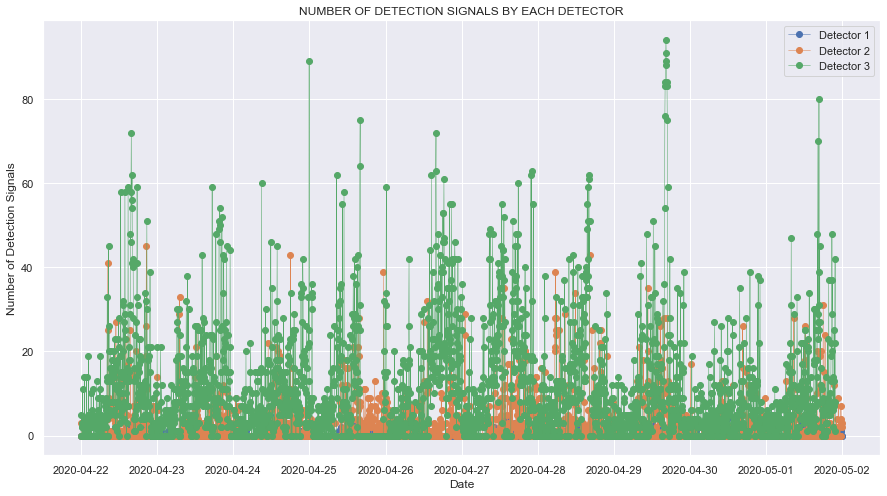

In [100]:
# To zoom in to period from 22-Apr to 01-May

# Set figure
fig, ax = plt.subplots(figsize=(15,8))

# Plot data
ax.plot(m.loc['2020-04-22':'2020-05-01', 'det_1':'det_3'], marker='o', linestyle='-', linewidth=0.5)
#ax.set_title('Zoom-in Plot')

# Set legend and x and y label
plt.legend(['Detector 1', 'Detector 2', 'Detector 3'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of Detection Signals')

# title
title = 'Number of Detection Signals by Each Detector'.upper()
plt.title(title, loc='center')
plt.show()

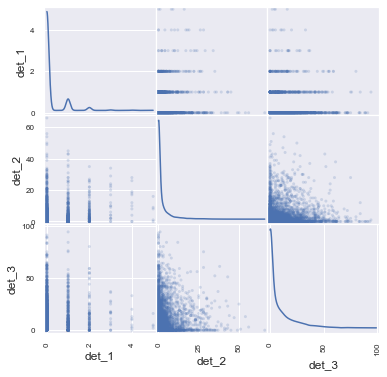

In [101]:
from pandas.plotting import scatter_matrix
scatter_matrix(m, alpha=0.2, figsize=(6, 6), diagonal='kde');

**Useful links:**

+ http://jonathansoma.com/lede/foundations-2017/classes/working-with-many-files/class/
+ https://queirozf.com/entries/pandas-time-series-examples-datetimeindex-periodindex-and-timedeltaindex
+ https://pbpython.com/pandas-grouper-agg.html
+ https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9